# 1. 자동 미분

In [1]:
import tensorflow as tf

In [2]:
w=tf.Variable(2.)

def f(w):
    y=w**2
    z=2*y+5
    return z

In [3]:
with tf.GradientTape() as tape:
    z=f(w)
    
gradients=tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


# 2. 자동 미분을 이용한 선형 회귀 구현

In [4]:
# 학습될 가중치 변수를 선언
w=tf.Variable(4.0)
b=tf.Variable(1.0)

In [5]:
def hypothesis(x):
    return w*x+b

In [6]:
x_test=[3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [7]:
#MSE
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred-y))

In [8]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [9]:
# 옵티마이저는 경사하강법, 학습률은 0.01
optimizer=tf.optimizers.SGD(0.01)

In [10]:
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(x)
        
        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)

    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w, b])

    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if i % 10 == 0:
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [11]:
x_test=[3.4, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[37.2921   54.295143 59.608593 64.92204 ]


# 3. 케라스로 구현하는 선형 회귀

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model=Sequential()

# 선형 회귀이므로 activation='linear'
model.add(Dense(1, input_dim=1, activation='linear'))

sgd=optimizers.SGD(0.01)

model.compile(optimizer=sgd, loss='mse', metrics='mse')

model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 317ms/step - loss: 4936.8975 - mse: 4936.8975
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 608.6110 - mse: 608.6110
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 76.0461 - mse: 76.0461
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 10.5160 - mse: 10.5160
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 2.4512 - mse: 2.4512
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 1.4570 - mse: 1.4570
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 1.3328 - mse: 1.3328
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 1.3157 - mse: 1.3157
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 1.3118 - mse: 1.3118
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 1.3095 - mse: 1.3095
Epoch 11/300
1/1 [==============================] - 0s 4ms/step

1/1 [==============================] - 0s 4ms/step - loss: 1.1901 - mse: 1.1901
Epoch 90/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1891 - mse: 1.1891
Epoch 91/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1880 - mse: 1.1880
Epoch 92/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1870 - mse: 1.1870
Epoch 93/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1859 - mse: 1.1859
Epoch 94/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1849 - mse: 1.1849
Epoch 95/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1839 - mse: 1.1839
Epoch 96/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1828 - mse: 1.1828
Epoch 97/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1818 - mse: 1.1818
Epoch 98/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1808 - mse: 1.1808
Epoch 99/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1798 - ms

1/1 [==============================] - 0s 6ms/step - loss: 1.1235 - mse: 1.1235
Epoch 177/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1230 - mse: 1.1230
Epoch 178/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1225 - mse: 1.1225
Epoch 179/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1220 - mse: 1.1220
Epoch 180/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1215 - mse: 1.1215
Epoch 181/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1210 - mse: 1.1210
Epoch 182/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1205 - mse: 1.1205
Epoch 183/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1200 - mse: 1.1200
Epoch 184/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1195 - mse: 1.1195
Epoch 185/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1190 - mse: 1.1190
Epoch 186/300
1/1 [==============================] - 0s 5ms/step - loss: 1

1/1 [==============================] - 0s 4ms/step - loss: 1.0910 - mse: 1.0910
Epoch 264/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0907 - mse: 1.0907
Epoch 265/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0905 - mse: 1.0905
Epoch 266/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0902 - mse: 1.0902
Epoch 267/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0900 - mse: 1.0900
Epoch 268/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0897 - mse: 1.0897
Epoch 269/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0895 - mse: 1.0895
Epoch 270/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0892 - mse: 1.0892
Epoch 271/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0890 - mse: 1.0890
Epoch 272/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0888 - mse: 1.0888
Epoch 273/300
1/1 [==============================] - 0s 5ms/step - loss: 1

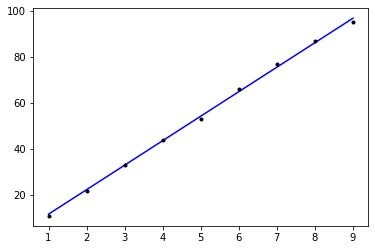

In [13]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [40]:
print(model.predict([9.299675]))

[[100.]]
